In [2]:
using CSV
using DataFrames
using GLM, Plots, Statistics
using DecisionTree
using XGBoost
using RCall
using SQLite

In [4]:
#load in the CSV file which is a set of rows
csv_titanic = CSV.File( "titanic.csv" )

891-element CSV.File:
 CSV.Row: (Survived = 0, Pclass = 3, Sex = String7("male"), Age = 22.0, Fare = 7.25)
 CSV.Row: (Survived = 1, Pclass = 1, Sex = String7("female"), Age = 38.0, Fare = 71.2833)
 CSV.Row: (Survived = 1, Pclass = 3, Sex = String7("female"), Age = 26.0, Fare = 7.925)
 CSV.Row: (Survived = 1, Pclass = 1, Sex = String7("female"), Age = 35.0, Fare = 53.1)
 CSV.Row: (Survived = 0, Pclass = 3, Sex = String7("male"), Age = 35.0, Fare = 8.05)
 CSV.Row: (Survived = 0, Pclass = 3, Sex = String7("male"), Age = missing, Fare = 8.4583)
 CSV.Row: (Survived = 0, Pclass = 1, Sex = String7("male"), Age = 54.0, Fare = 51.8625)
 CSV.Row: (Survived = 0, Pclass = 3, Sex = String7("male"), Age = 2.0, Fare = 21.075)
 CSV.Row: (Survived = 1, Pclass = 3, Sex = String7("female"), Age = 27.0, Fare = 11.1333)
 CSV.Row: (Survived = 1, Pclass = 2, Sex = String7("female"), Age = 14.0, Fare = 30.0708)
 CSV.Row: (Survived = 1, Pclass = 3, Sex = String7("female"), Age = 4.0, Fare = 16.7)
 CSV.Row: (Su

In [5]:
typeof(csv_titanic)

CSV.File

In [6]:
size( csv_titanic )

(891,)

In [7]:
csv_titanic[1]

CSV.Row: (Survived = 0, Pclass = 3, Sex = String7("male"), Age = 22.0, Fare = 7.25)

In [8]:
df_titanic = DataFrame( csv_titanic )

Row,Survived,Pclass,Sex,Age,Fare
,Int64,Int64,String7,Float64?,Float64
1,0,3,male,22.0,7.25
2,1,1,female,38.0,71.2833
3,1,3,female,26.0,7.925
4,1,1,female,35.0,53.1
5,0,3,male,35.0,8.05
6,0,3,male,missing,8.4583
7,0,1,male,54.0,51.8625
8,0,3,male,2.0,21.075
9,1,3,female,27.0,11.1333


In [9]:
size( df_titanic )

(891, 5)

In [10]:
names( df_titanic )

5-element Vector{String}:
 "Survived"
 "Pclass"
 "Sex"
 "Age"
 "Fare"

In [11]:
describe(df_titanic)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,Survived,0.383838,0,0.0,1,0,Int64
2,Pclass,2.30864,1,3.0,3,0,Int64
3,Sex,,female,,male,0,String7
4,Age,29.6991,0.42,28.0,80.0,177,"Union{Missing, Float64}"
5,Fare,32.2042,0.0,14.4542,512.329,0,Float64


In [12]:
df_titanic[1:4,:]

Row,Survived,Pclass,Sex,Age,Fare
,Int64,Int64,String7,Float64?,Float64
1,0,3,male,22.0,7.25
2,1,1,female,38.0,71.2833
3,1,3,female,26.0,7.925
4,1,1,female,35.0,53.1


In [13]:
df_titanic[end-4:end,:]

Row,Survived,Pclass,Sex,Age,Fare
,Int64,Int64,String7,Float64?,Float64
1,0,2,male,27.0,13.0
2,1,1,female,19.0,30.0
3,0,3,female,missing,23.45
4,1,1,male,26.0,30.0
5,0,3,male,32.0,7.75


In [15]:
df_titanic[ end-4:end , [1,2,5] ]

Row,Survived,Pclass,Fare
,Int64,Int64,Float64
1,0,2,13.0
2,1,1,30.0
3,0,3,23.45
4,1,1,30.0
5,0,3,7.75


In [17]:
df_titanic[ end-4:end , :Fare ]

5-element Vector{Float64}:
 13.0
 30.0
 23.45
 30.0
  7.75

In [18]:
df_titanic[ end-4:end , [:Fare,:Pclass] ]

Row,Fare,Pclass
,Float64,Int64
1,13.0,2
2,30.0,1
3,23.45,3
4,30.0,1
5,7.75,3


In [19]:
df_titanic[ end-4:end , ["Fare","Pclass"] ]

Row,Fare,Pclass
,Float64,Int64
1,13.0,2
2,30.0,1
3,23.45,3
4,30.0,1
5,7.75,3


In [20]:
df_titanic[ end-4:end , [Symbol("Fare"),Symbol("Pclass")] ]

Row,Fare,Pclass
,Float64,Int64
1,13.0,2
2,30.0,1
3,23.45,3
4,30.0,1
5,7.75,3


In [21]:
nrow( df_titanic )

891

In [22]:
nrow( df_titanic[ completecases(df_titanic) , : ] )

714

In [23]:
df_titanic = df_titanic[ completecases(df_titanic) , : ];

In [24]:
nrow( df_titanic )

714

In [18]:
# also the use of 'dropmissing(df, :a)'

In [25]:
ols_titanic = lm( @formula( Age ~ Fare ) , df_titanic )

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Age ~ 1 + Fare

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  28.7842      0.647646   44.44    <1e-99  27.5127      30.0557
Fare          0.0263708   0.0102399   2.58    0.0102   0.00626671   0.0464748
─────────────────────────────────────────────────────────────────────────────

In [26]:
typeof( ols_titanic )

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

In [27]:
fieldnames( typeof( ols_titanic ) )

(:model, :mf, :mm)

In [28]:
ols_titanic.model

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}:

Coefficients:
────────────────────────────────────────────────────────────────────
         Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────
x1  28.7842      0.647646   44.44    <1e-99  27.5127      30.0557
x2   0.0263708   0.0102399   2.58    0.0102   0.00626671   0.0464748
────────────────────────────────────────────────────────────────────


In [29]:
stderror( ols_titanic )

2-element Vector{Float64}:
 0.6476455906910649
 0.010239919595100752

In [30]:
GLM.predict( ols_titanic ) 

714-element Vector{Float64}:
 28.975384875894424
 30.663991846538575
 28.993185140837582
 30.18448435388532
 28.996481486197425
 30.15185053482286
 29.339960672693206
 29.07779045938149
 29.577186781397906
 29.224588585098655
 29.484340599454384
 28.996481486197425
 29.6089424540565
  ⋮
 28.99241511456152
 30.977144655723787
 29.469836679871072
 28.99241511456152
 29.06153024699045
 29.061089855250376
 28.970110723318673
 29.55224531386718
 29.127016762447262
 29.575319731386088
 29.575319731386088
 28.988570257333798

In [31]:
r2( ols_titanic )

0.009228809267447402

In [32]:
GLM.predict( ols_titanic , DataFrame( Fare = [1,10,100] ) )

3-element Vector{Union{Missing, Float64}}:
 28.810567607902207
 29.047904473811
 31.421273132898907

In [33]:
diffs = df_titanic[:,"Age"] .- GLM.predict( ols_titanic ) 
mean_diffs = mean(diffs)

6.264518937828894e-15

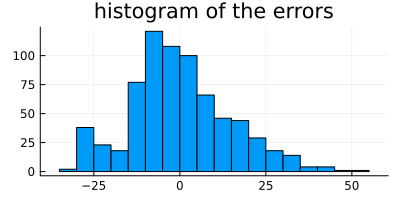

In [34]:
plot( diffs , seriestype="histogram" , title="histogram of the errors" , size=(400,200) , legend=false )

In [35]:
lr_titanic = glm( @formula( Survived ~ Age + Fare ) , df_titanic , Binomial() , ProbitLink() )

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Survived ~ 1 + Age + Fare

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.246053    0.113674    -2.16    0.0304  -0.46885     -0.0232552
Age          -0.0102863   0.0034205   -3.01    0.0026  -0.0169904   -0.00358223
Fare          0.00933569  0.00142315   6.56    <1e-10   0.00654637   0.012125
───────────────────────────────────────────────────────────────────────────────

In [36]:
GLM.predict( lr_titanic , DataFrame( Age = [10,20,30] , Fare = [1,10,100] ) ) 

3-element Vector{Union{Missing, Float64}}:
 0.36708639460306935
 0.3600138384275724
 0.6476291162411383

In [37]:
names( df_titanic )

5-element Vector{String}:
 "Survived"
 "Pclass"
 "Sex"
 "Age"
 "Fare"

In [38]:
m_dt1 = build_tree( df_titanic[:,"Survived"] , Matrix( df_titanic[:,["Pclass","Age"]] ) )

Decision Tree
Leaves: 130
Depth:  14

In [40]:
print_tree( m_dt1 , 5 ) #print up to depth

Feature 1 < 2.5 ?
├─ Feature 2 < 17.5 ?
    ├─ Feature 2 < 15.5 ?
        ├─ Feature 1 < 1.5 ?
            ├─ Feature 2 < 3.0 ?
                ├─ 
                └─ 1 : 4/4
            └─ 1 : 19/19
        └─ Feature 1 < 1.5 ?
            ├─ 1 : 6/6
            └─ Feature 2 < 16.5 ?
                ├─ 0 : 2/2
                └─ 1 : 2/2
    └─ Feature 1 < 1.5 ?
        ├─ Feature 2 < 44.5 ?
            ├─ Feature 2 < 36.5 ?
                ├─ 
                └─ 
            └─ Feature 2 < 60.5 ?
                ├─ 
                └─ 
        └─ Feature 2 < 50.5 ?
            ├─ Feature 2 < 39.5 ?
                ├─ 
                └─ 
            └─ Feature 2 < 53.0 ?
                ├─ 0 : 3/3
                └─ 
└─ Feature 2 < 6.5 ?
    ├─ Feature 2 < 0.875 ?
        ├─ 1 : 3/3
        └─ Feature 2 < 2.5 ?
            ├─ Feature 2 < 1.5 ?
                ├─ 1 : 3/5
                └─ 0 : 6/7
            └─ Feature 2 < 4.5 ?
                ├─ 
                └─ 
    └─ Feature 2

In [41]:
apply_tree( m_dt1 , Matrix( df_titanic[1:5,["Pclass","Age"]] ) )

5-element Vector{Int64}:
 0
 1
 0
 1
 0

In [43]:
apply_tree_proba( m_dt1 , Matrix( df_titanic[1:5,["Pclass","Age"]] ) , [0,1] )

5×2 Matrix{Float64}:
 0.75      0.25
 0.333333  0.666667
 0.714286  0.285714
 0.0       1.0
 0.833333  0.166667

In [44]:
predictions_survived = apply_tree( m_dt1 , Matrix( df_titanic[:,["Pclass","Age"]] ) );

In [45]:
DecisionTree.confusion_matrix( df_titanic[:,"Survived"] , predictions_survived )

2×2 Matrix{Int64}:
 375   49
 105  185

Classes:  [0, 1]
Matrix:   
Accuracy: 0.7843137254901961
Kappa:    0.5388061203946044

In [56]:
n_subfeatures=0; max_depth=14; min_samples_leaf=1; min_samples_split=2
min_purity_increase=0.0; pruning_purity = 1.0; seed=3

m_dt2 = build_tree( df_titanic[:,"Survived"] , Matrix( df_titanic[:,["Pclass","Age"]] ) ,
                        n_subfeatures,
                        max_depth,
                        min_samples_leaf,
                        min_samples_split,
                        min_purity_increase;
                        rng = seed)

Decision Tree
Leaves: 130
Depth:  14

In [57]:
predictions_survived_2 = apply_tree( m_dt2 , Matrix( df_titanic[:,["Pclass","Age"]] ) );
DecisionTree.confusion_matrix( df_titanic[:,"Survived"] , predictions_survived_2 )

2×2 Matrix{Int64}:
 375   49
 105  185

Classes:  [0, 1]
Matrix:   
Accuracy: 0.7843137254901961
Kappa:    0.5388061203946044

In [58]:
# using 2 random features, 30 trees, 0.5 portion of samples per tree, and a maximum tree depth of 4
m_rf1 = build_forest( df_titanic[:,"Survived"] , Matrix( df_titanic[:,["Pclass","Age","Fare"]] ) , 2 , 30, 0.5, 4)

Ensemble of Decision Trees
Trees:      30
Avg Leaves: 12.733333333333333
Avg Depth:  4.0

In [60]:
apply_forest( m_rf1 , Matrix( df_titanic[1:3,["Pclass","Age","Fare"]] ) )

3-element Vector{Int64}:
 0
 1
 0

In [61]:
apply_forest_proba( m_rf1 , Matrix( df_titanic[1:3,["Pclass","Age","Fare"]] ) , [0,1] )

3×2 Matrix{Float64}:
 1.0       0.0
 0.133333  0.866667
 1.0       0.0

In [62]:
m_xgb1 = xgboost( ( Matrix( df_titanic[:,["Pclass","Age","Fare"]] ) , df_titanic[:,"Survived"] ) , num_round=5 , 
                                        max_depth=6 , objective="binary:logistic" )

[ Info: XGBoost: starting training.
[ Info: [1]	train-logloss:0.60995995752116883
[ Info: [2]	train-logloss:0.56218531210215483
[ Info: [3]	train-logloss:0.52682371771469172
[ Info: [4]	train-logloss:0.50034170539355749
[ Info: [5]	train-logloss:0.47146305974040714
[ Info: Training rounds complete.


╭──── XGBoost.Booster ─────────────────────────────────────────────────────────╮
│  Features: 3 (unknown names)                                                 │
│                                                                              │
│          Parameter               Value                                       │
│   ───────────────────────────────────────────                                │
│          max_depth                 6                                         │
│                                                                              │
│          objective          binary:logistic                                  │
│                                                                              │
│     validate_parameters          true                                        │
│                                                                              │
╰──── boosted rounds: 5 ───────────────────────────────────────────────────────╯


In [64]:
XGBoost.predict( m_xgb1 , Matrix( df_titanic[1:6,["Pclass","Age","Fare"]] ) )

6-element Vector{Float32}:
 0.28281942
 0.7581966
 0.23063365
 0.7766299
 0.18721043
 0.49019495

In [67]:
x1 = rand( 100 );

In [68]:
@rput x1

100-element Vector{Float64}:
 0.5417843084889216
 0.8452406460289107
 0.4758521088546005
 0.46445662098958795
 0.3581808890494076
 0.6600952811042214
 0.1650979086848835
 0.22123100587765554
 0.9765729549686363
 0.9421142897775713
 0.5059079842194466
 0.8801079543707673
 0.41342663457351114
 ⋮
 0.9717113523488158
 0.8593455330699691
 0.5817533344733947
 0.23044845629776922
 0.9468121138864077
 0.30054414514924654
 0.3281996679436625
 0.41089760613921567
 0.6781912295914956
 0.15581916089343006
 0.26329610252537405
 0.773423907921645

In [70]:
rx1 = R"mean(x1)"

RObject{RealSxp}
[1] 0.5323095


In [71]:
rx2 = rcopy( R"mean(x1)" )

0.5323094727069777

In [72]:
R"y = $(randn(50))"

RObject{RealSxp}
 [1]  0.54277845  0.10419058  0.04372188  0.27820637 -0.86212680 -0.97084352
 [7]  0.84739490 -0.38562256  0.52518764 -1.55965647  2.13287766 -1.17759639
[13]  1.21776620 -0.37574172 -0.63095130  0.29335815  1.52366314  0.78072316
[19] -0.32348862 -0.26770363  0.49126025 -0.06137564  0.70845190  1.45721719
[25] -1.56135738 -0.98891795  0.29538952  0.67111585 -0.23743335 -0.18062878
[31] -1.48578674 -1.72862498 -0.55463517 -0.01045455  0.13537797 -0.85003062
[37]  0.28910690  0.26714686  0.27307400  1.28862486  0.86200461 -1.50545318
[43] -0.32887905 -0.39662924 -0.04407551 -0.61048620  0.93995657 -0.13315824
[49]  0.06428556 -0.25776473


In [73]:
rcopy( R"mean(y)" )

-0.02913084361097751

In [74]:
y

LoadError: UndefVarError: y not defined

In [75]:
R"t = t.test(y,mu=3)"

RObject{VecSxp}

	One Sample t-test

data:  y
t = -24.843, df = 49, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 3
95 percent confidence interval:
 -0.2741570  0.2158953
sample estimates:
  mean of x 
-0.02913084 



In [77]:
t_testR = rcopy( R"t = t.test(y,mu=3)" )

OrderedCollections.OrderedDict{Symbol, Any} with 10 entries:
  :statistic   => -24.8433
  :parameter   => 49.0
  :p_value     => 2.00528e-29
  :conf_int    => [-0.274157, 0.215895]
  :estimate    => -0.0291308
  :null_value  => 3.0
  :stderr      => 0.121929
  :alternative => "two.sided"
  :method      => "One Sample t-test"
  :data_name   => "y"

In [79]:
fieldnames( typeof( t_testR ) )

(:slots, :keys, :vals, :ndel, :maxprobe, :dirty)

In [80]:
t_testR.keys

10-element Vector{Symbol}:
 :statistic
 :parameter
 :p_value
 :conf_int
 :estimate
 :null_value
 :stderr
 :alternative
 :method
 :data_name

In [86]:
t_testR[:p_value]

2.0052767677137792e-29

In [87]:
t_testR[Symbol("p_value")]

2.0052767677137792e-29

In [90]:
t_testR2 = rcopy( R"t2 = t.test( $(randn(100) .+ 3) , mu=3 )" )

OrderedCollections.OrderedDict{Symbol, Any} with 10 entries:
  :statistic   => 1.26931
  :parameter   => 99.0
  :p_value     => 0.207305
  :conf_int    => [2.92429, 3.34456]
  :estimate    => 3.13443
  :null_value  => 3.0
  :stderr      => 0.105905
  :alternative => "two.sided"
  :method      => "One Sample t-test"
  :data_name   => "`#JL`\$`(randn(100) .+ 3)`"

In [91]:
t_testR2[:p_value]

0.20730514674199954

In [92]:
R"""
library(rpart)
"""

RObject{StrSxp}
[1] "rpart"     "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     


In [93]:
R"""
head( $(df_titanic) )
"""

RObject{VecSxp}
  Survived Pclass    Sex Age    Fare
1        0      3   male  22  7.2500
2        1      1 female  38 71.2833
3        1      3 female  26  7.9250
4        1      1 female  35 53.1000
5        0      3   male  35  8.0500
6        0      1   male  54 51.8625


In [94]:
res = R"""
dt_R = rpart( Survived ~ Age + Fare , data = $(df_titanic) )
predict( dt_R, data.frame(Age=c(20),Fare=c(35) ) )
"""

RObject{RealSxp}
        1 
0.3894389 


In [62]:
res

RObject{RealSxp}
        1 
0.3894389 


In [95]:
rcopy( res )

0.38943894389438943

In [96]:
db = SQLite.DB("test1.sqlite")

SQLite.DB("test1.sqlite")

In [97]:
DBInterface.execute( db , "CREATE TABLE  table1(name  TEXT PRIMARY KEY, state TEXT NOT NULL, car TEXT )")

SQLite.Query{false}(SQLite.Stmt(SQLite.DB("test1.sqlite"), Base.RefValue{Ptr{SQLite.C.sqlite3_stmt}}(Ptr{SQLite.C.sqlite3_stmt} @0x000000000fd6f238), Dict{Int64, Any}()), Base.RefValue{Int32}(101), Symbol[], Type[], Dict{Symbol, Int64}(), Base.RefValue{Int64}(0))

In [98]:
SQLite.tables( db )

1-element Vector{SQLite.DBTable}:
 SQLite.DBTable("table1", Tables.Schema:
 :name   Union{Missing, String}
 :state  Union{Missing, String}
 :car    Union{Missing, String})

In [99]:

DBInterface.execute( db , "INSERT INTO table1 VALUES (\"Alex\",\"FL\",\"Dodge\")" )

SQLite.Query{false}(SQLite.Stmt(SQLite.DB("test1.sqlite"), Base.RefValue{Ptr{SQLite.C.sqlite3_stmt}}(Ptr{SQLite.C.sqlite3_stmt} @0x0000000015059958), Dict{Int64, Any}()), Base.RefValue{Int32}(101), Symbol[], Type[], Dict{Symbol, Int64}(), Base.RefValue{Int64}(0))

In [100]:
tmp = ("Bob","FL","Buick")
DBInterface.execute( db , "INSERT INTO table1 VALUES $(tmp)" )

SQLite.Query{false}(SQLite.Stmt(SQLite.DB("test1.sqlite"), Base.RefValue{Ptr{SQLite.C.sqlite3_stmt}}(Ptr{SQLite.C.sqlite3_stmt} @0x0000000015058ff8), Dict{Int64, Any}()), Base.RefValue{Int32}(101), Symbol[], Type[], Dict{Symbol, Int64}(), Base.RefValue{Int64}(0))

In [101]:
DBInterface.execute( db , "SELECT * FROM table1" ) |> DataFrame

Row,name,state,car
,String,String,String
1,Alex,FL,Dodge
2,Bob,FL,Buick


In [102]:
df_tmp = DataFrame(name=["Cat","Derek","Eric"],state=["FL","GA","FL"],car=["Toyota","","Jeep"])

Row,name,state,car
,String,String,String
1,Cat,FL,Toyota
2,Derek,GA,
3,Eric,FL,Jeep


In [103]:
df_tmp |> SQLite.load!( db , "table1" )

"table1"

In [104]:
DBInterface.execute( db , "SELECT * FROM table1" ) |> DataFrame

Row,name,state,car
,String,String,String
1,Alex,FL,Dodge
2,Bob,FL,Buick
3,Cat,FL,Toyota
4,Derek,GA,
5,Eric,FL,Jeep


In [106]:
DBInterface.execute( db , "DELETE FROM table1 WHERE name=\"Bob\"" )

SQLite.Query{false}(SQLite.Stmt(SQLite.DB("test1.sqlite"), Base.RefValue{Ptr{SQLite.C.sqlite3_stmt}}(Ptr{SQLite.C.sqlite3_stmt} @0x0000000015057888), Dict{Int64, Any}()), Base.RefValue{Int32}(101), Symbol[], Type[], Dict{Symbol, Int64}(), Base.RefValue{Int64}(0))

In [107]:
DBInterface.execute( db , "SELECT * FROM table1" ) |> DataFrame

Row,name,state,car
,String,String,String
1,Alex,FL,Dodge
2,Cat,FL,Toyota
3,Derek,GA,
4,Eric,FL,Jeep


In [108]:
x1 = 1:10

1:10

In [109]:
map( x -> x+22 , x1 )

10-element Vector{Int64}:
 23
 24
 25
 26
 27
 28
 29
 30
 31
 32

In [110]:
f1(x) = x+22

f1 (generic function with 1 method)

In [111]:
map( x -> f1(x) , x1 )

10-element Vector{Int64}:
 23
 24
 25
 26
 27
 28
 29
 30
 31
 32

In [113]:
map( f1 , x1 )

10-element Vector{Int64}:
 23
 24
 25
 26
 27
 28
 29
 30
 31
 32

In [117]:
map( (x,y)->x+y , 1:3 , 11:13 )

3-element Vector{Int64}:
 12
 14
 16

In [118]:
f2(x,y) = x+y

f2 (generic function with 1 method)

In [119]:
map( f2 , 1:3 , 11:13 )

3-element Vector{Int64}:
 12
 14
 16

In [121]:
f2.( 1:3 , 11:13 )

3-element Vector{Int64}:
 12
 14
 16

In [122]:
map( (x,y,z)->x+y+z , 1:3 , 11:13 , 101:103)

3-element Vector{Int64}:
 113
 116
 119

In [133]:
mat_names = DBInterface.execute( db , "SELECT name FROM table1" ) |> DataFrame |>
                                             Matrix |> res -> map( name -> name * " is cool" ,res )

4×1 Matrix{String}:
 "Alex is cool"
 "Cat is cool"
 "Derek is cool"
 "Eric is cool"

In [128]:
map( name -> name * " is cool" , mat_names )

4×1 Matrix{String}:
 "Alex is cool"
 "Cat is cool"
 "Derek is cool"
 "Eric is cool"

In [134]:
reduce( + , 1:10 )

55

In [135]:
reduce( + , 1:10 , init = 100)

155

In [136]:
f3(x1,x2) = x1+x2

f3 (generic function with 1 method)

In [137]:
reduce( f3 , 1:10 , init = 100)

155

In [138]:
reduce( (x1,x2)->x1+x2 , 1:10 , init = 100)

155

In [142]:
filter( x-> x%3 == 0 , 1:20 )

6-element Vector{Int64}:
  3
  6
  9
 12
 15
 18

In [143]:
filter( x-> x%3 == 0 || x%7 == 0 , 1:20 )

8-element Vector{Int64}:
  3
  6
  7
  9
 12
 14
 15
 18

In [147]:
filter( row-> row["Survived"]==1 , filter( row-> row["Age"] >= 40 , df_titanic ) ) |> res-> filter(x->x["Pclass"]>1,res)

Row,Survived,Pclass,Sex,Age,Fare
,Int64,Int64,String7,Float64?,Float64
1,1,2,female,55.0,16.0
2,1,2,female,40.0,15.75
3,1,2,female,50.0,26.0
4,1,2,female,41.0,19.5
5,1,2,male,42.0,13.0
6,1,3,male,45.0,8.05
7,1,2,female,40.0,13.0
8,1,3,male,44.0,7.925
9,1,2,female,42.0,26.0


In [148]:
filter(row-> row["Age"] >= 40,df_titanic) |> res-> filter(row-> row["Survived"]==1,res) |> res-> filter(x->x["Pclass"]>1,res)

Row,Survived,Pclass,Sex,Age,Fare
,Int64,Int64,String7,Float64?,Float64
1,1,2,female,55.0,16.0
2,1,2,female,40.0,15.75
3,1,2,female,50.0,26.0
4,1,2,female,41.0,19.5
5,1,2,male,42.0,13.0
6,1,3,male,45.0,8.05
7,1,2,female,40.0,13.0
8,1,3,male,44.0,7.925
9,1,2,female,42.0,26.0


In [151]:
filter(row-> row["Age"] >= 40,df_titanic) |> res-> filter(row-> row["Survived"]==1,res) |> res-> filter(x->x["Pclass"]>1,res)[:,:Fare] |> sum    

366.0625